In [1]:
# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

# MAT281

## Aplicaciones de la Matemática en la Ingeniería

Puedes ejecutar este jupyter notebook de manera interactiva:

[![Binder](../shared/images/jupyter_binder.png)](https://mybinder.org/v2/gh/sebastiandres/mat281_m04_data_science/master?filepath=03_regresion_lineal/03_regresion_lineal.ipynb)

[![Colab](../shared/images/jupyter_colab.png)](https://colab.research.google.com/github/sebastiandres/mat281_m04_data_science/blob/master//03_regresion_lineal/03_regresion_lineal.ipynb)

## Intrucciones
Completa tus datos personales (nombre y rol USM).
Debes enviar este .ipynb con el siguiente formato de nombre: 0X_filename_NOMBRE_APELLIDO.ipynb con tus respuestas a alonso.ogueda@gmail.com y sebastian.flores@usm.cl .

__Se evaluará:__
- Soluciones
- Código
- Al presionar Kernel -> Restart Kernel and Run All Cells deben ejecutarse todas las celdas sin error.
- La escala es de 0 a 4 considerando solo valores enteros.
- La entrega es al final de esta clase.

__Nombre:__

__Rol:__

## ¿Qué contenido aprenderemos?

Regresión Lineal

## Regresión Lineal

Técnica universalmente utilizada y a pesar de su simpletaza, la derivación de este método entrega importantes consideraciones sobre su implementación, sus hipótesis y sus posibles extensiones.

### Motivación

Por motivos pedagógicos utilizaremos un set de datos que ha sido testeado a lo largo de los años en la literatura, el que consiste en registros de peso del cerebro y cuerpo de distintos mamíferos.

In [2]:
%%bash
head data/brain_and_body_weight.txt -n 60

#  x01.txt
#
#  Reference:
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 304,
#    ISBN 0-12-656460-4.
#
#    S Weisberg,
#    Applied Linear Regression,
#    Wiley, 1980, pages 128-129.
#
#  Discussion:
#
#    The data records the average weight of the brain and body for
#    a number of mammal species.  
#
#    There are 62 rows of data.  The 3 data columns include:
#
#      I,  the index,
#      A1, the brain weight;
#      B,  the body weight.
#
#    We seek a model of the form:
#
#      B = A1 * X1.
#
3 columns
62 rows
Index
Brain Weight
Body Weight
 1     3.385    44.500
 2     0.480    15.500
 3     1.350     8.100
 4   465.000   423.000
 5    36.330   119.500
 6    27.660   115.000
 7    14.830    98.200
 8     1.040     5.500
 9     4.190    58.000
10     0.425     6.400
11     0.101     4.000
12     0.920     5.700
13     1.000     6.600
14     0.005     0.140
15     0.060     1.000
16     3.500    10.800
17     2.00

In [3]:
import numpy as np
import pandas as pd
import altair as alt

In [4]:
# Read data
data_txt = np.loadtxt("data/brain_and_body_weight.txt", skiprows=33)
brain_body_df = pd.DataFrame(data_txt[:, [1, 2]], index=data_txt[:, 0].astype(int), columns=["wgt_brain", "wgt_body"])
brain_body_df.head()

,wgt_brain,wgt_body
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


### Exploración

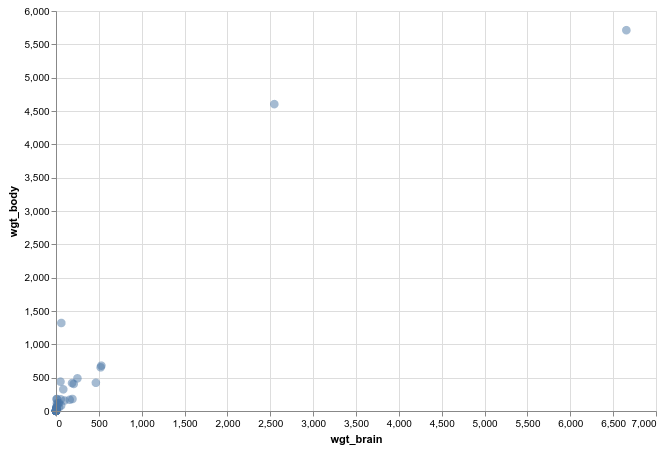

In [5]:
alt.Chart(brain_body_df).mark_circle(size=75, opacity=0.5).encode(
    x="wgt_brain:Q",
    y="wgt_body:Q"
).properties(
    width=600,
    height=400
)

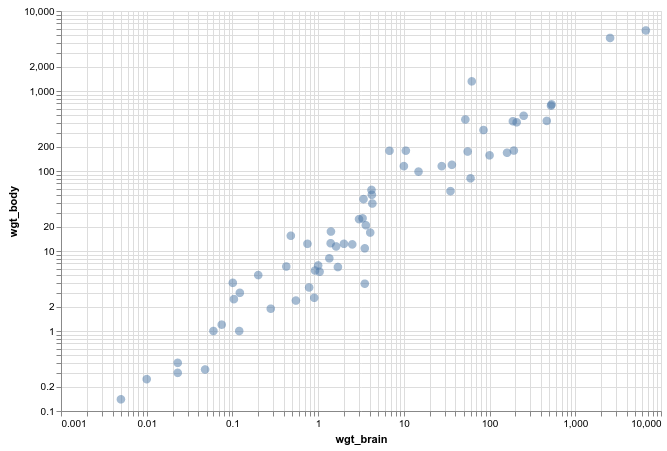

In [6]:
# Logarithmic Scale
alt.Chart(brain_body_df).mark_circle(size=75, opacity=0.5).encode(
    x=alt.X("wgt_brain:Q", 
          scale=alt.Scale(type="log")),
    y=alt.Y("wgt_body:Q", scale=alt.Scale(type="log"))
).properties(
    width=600,
    height=400
)

## Los datos

Supondremos que tenemos $m$ datos. 
Cada dato $x^{(i)}$, $i=1,\dots,$ $m$ tiene $n$ componentes,
$x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$. 

Conocemos además el valor (etiqueta) asociado a $x^{(i)}$ que llamaremos $y^{(i)}$, $i=1,\dots, m$ .

## Modelo

Nuestra hipótesis de modelo lineal puede escribirse como

$$\begin{aligned}
h_{\theta}(x) &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \\
          &= \begin{bmatrix}\theta_0 & \theta_1 & \theta_2 & \dots & \theta_n\end{bmatrix} \begin{bmatrix}1 \\ x_1 \\x_2 \\ \vdots \\ x_n\end{bmatrix} \\
          &= \theta^T \begin{bmatrix}1\\x\end{bmatrix} = \begin{bmatrix}1 & x^T\end{bmatrix} \theta \end{aligned}$$


Definiremos $x^{(i)}_0 =1$, de modo que
$h_{\theta}(x^{(i)}) = (x^{(i)})^T \theta $ y buscamos el vector de parámetros
$$\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n\end{bmatrix}$$


Definamos las matrices

$$\begin{aligned}
Y &= \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{bmatrix}\end{aligned}$$

y

$$\begin{aligned}
X = 
\begin{bmatrix} 
1 & x^{(1)}_1 & \dots & x^{(1)}_n \\ 
1 & x^{(2)}_1 & \dots & x^{(2)}_n \\
\vdots & \vdots & & \vdots \\
1 & x^{(m)}_1 & \dots & x^{(m)}_n \\
\end{bmatrix}
= 
\begin{bmatrix} 
- (x^{(1)})^T - \\ 
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\
\end{bmatrix}\end{aligned}$$


Luego la evaluación
de todos los datos puede escribirse matricialmente como

$$\begin{aligned}
X \theta &= 
\begin{bmatrix}
1 & x_1^{(1)} & ... & x_n^{(1)} \\
\vdots & \vdots & & \vdots \\
1 & x_1^{(m)} & ... & x_n^{(m)} \\
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_n\end{bmatrix} \\
& = 
\begin{bmatrix}
1 \theta_0 + x^{(1)}_1 \theta_1 + ... + x^{(1)}_n \theta_n \\
\vdots \\
1 \theta_0 + x^{(m)}_1 \theta_1 + ... + x^{(m)}_n \theta_n \\
\end{bmatrix} \\
& = 
\begin{bmatrix}
h(x^{(1)}) \\
\vdots \\
h(x^{(m)})
\end{bmatrix}\end{aligned}$$


Nuestro problema es
encontrar un “buen” conjunto de valores $\theta$ de modo que

$$\begin{aligned}
\begin{bmatrix}
h(x^{(1)}) \\
h(x^{(2)}) \\
\vdots \\
h(x^{(m)})
\end{bmatrix}
\approx
\begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{bmatrix}\end{aligned}$$

es decir, que $$X \theta \approx Y$$

Para encontrar el mejor vector $\theta$ podríamos definir una función de costo $J(\theta)$ de la siguiente manera:

$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

El mejor vector $\theta$ sería aquel que permite minimizar la norma 2 entre la predicción y el valor real.

## Aproximación Ingenieril

¿Cómo podemos resolver el problema
en el menor número de pasos?

Deseamos resolver el sistema $$A \theta = b$$ con
$A \in \mathbb{R}^{m \times n}$ y $m > n$ (La matrix $A$ es skinny).

¿Cómo resolvemos?

Bueno,
si $A \in \mathbb{R}^{m \times n}$, entonces
$A^T \in \mathbb{R}^{n \times m}$ y la multiplicación está bien definida
y obtengo un sistema lineal $n \times n$. $$(A^T A) \  \theta = A^T b$$ Si la
matriz $A^T A$ es invertible, el sistema se puede solucionar “sin mayor
reparo”. $$\theta = (A^T A)^{-1} A^T b$$

En nuestro caso, obtendríamos $$\theta = (X^T X)^{-1} X^T Y$$ Esta
respuesta, aunque correcta, no admite interpretaciones y no permite
generalizar a otros casos más generales.

En particular...

-   ¿Qué relación tiene con la función de costo (no) utilizada?

-   ¿Qué pasa si $A^T A$ no es invertible?


## Aproximación Machine Learning

¿Cómo podemos obtener una
buena aproximación para $\theta$?

Queremos encontrar $\theta^*$ que minimice $J(\theta)$.

Basta con utilizar una buena rutina de optimización para cumplir con
dicho objetivo.

En particular, una elección natural es tomar la dirección de mayor
descenso, es decir, el método del máximo descenso (gradient descent).
$$\theta^{(n+1)} = \theta^{(n)} - \alpha \nabla_{\theta} J(\theta^{(n)})$$
donde $\alpha >0$ es la tasa de aprendizaje.


En
nuestro caso, puesto que tenemos
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
se tiene que

$$\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_k} &=
\frac{\partial }{\partial \theta_k} \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 \\
&= \frac{1}{2} \sum_{i=1}^{m}  2 \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \frac{\partial h_{\theta}(x^{(i)})}{\partial \theta_k}  \\
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) x^{(i)}_k\end{aligned}$$


Este
algoritmo se llama Least Mean Squares

$$\begin{aligned}
\theta^{(n+1)} & = \theta^{(n)} - \alpha \nabla_{\theta} J(\theta^{(n)}) \\
\frac{\partial J(\theta)}{\partial \theta_k}
&= \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) x^{(i)}_k\end{aligned}$$

OBS: La elección de $\alpha$ es crucial para la convergencia. En
particular, $0.01/m$ funciona bien.

In [7]:
import numpy as np
from numpy.linalg import norm
def lms_regression_slow(X, Y, theta, tol=1E-6):
    converged = False
    alpha = 0.01/len(Y)
    while not converged:
        gradient = 0.
        for xiT, yi in zip(X,Y):
            hi = np.dot(theta, xiT)
            gradient += (hi - yi)*xiT.T
        new_theta = theta - alpha * gradient
        converged = norm(theta-new_theta) < tol * norm(theta)
        theta = new_theta
    return theta

def lms_regression_fast(X, Y, theta, tol=1E-6):
    converged = False
    alpha = 0.01/len(Y)
    theta = theta.reshape(X.shape[1], 1)
    A = np.dot(X.T,X)
    b = np.dot(X.T, Y)
    while not converged:
        gradient = np.dot(A, theta) - b
        new_theta = theta - alpha * gradient
        converged = norm(theta-new_theta) < tol * norm(theta)
        theta = new_theta
    return theta

m = 1000
t = np.linspace(0,1,m)
x = 2 + 2*t
y = 300 + 100*t
X = np.array([np.ones(m), x]).T
Y = y.reshape(m,1)
theta_0 = np.array([[0.0,0.0]])
theta = lms_regression_fast(X, Y, theta_0)
print(theta)

[[199.39672176]
 [ 50.19457286]]


In [8]:
np.dot(theta_0, next(zip(X, Y))[0])

array([0.])

### Least Mean Squares

Resultados:

-   Tarda del orden de 4 segundos para un problema ridículamente
    pequeño.

-   Precisión no es tan buena como esperábamos $\theta=(199.40, \, 50.19)$
    en vez de $(200, \, 50)$.

-   ¿Hay algo mejor que se pueda hacer?


## Interpretación Matemática
**¿Cómo podemos obtener una
justificación para la ecuación normal?**

Necesitamos los siguientes ingredientes:

$$\begin{aligned}
\nabla_x &(x^T A x) = A x + A^T x \\ 
\nabla_x &(b^T x) = b \end{aligned}$$

Se tiene

$$\begin{aligned}
J(\theta) 
&= \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 \\
&= \frac{1}{2} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \left( h_{\theta}(x^{(i)}) - y^{(i)}\right) \\
&= \frac{1}{2} \left( X \theta - Y \right)^T \left( X \theta - Y \right) \\
&= \frac{1}{2} \left( \theta^T X^T - Y^T \right) \left( X \theta - Y \right) \\
&= \frac{1}{2} \left( \theta^T X^T X \theta - \theta^T X^T Y - Y^T X \theta + Y^T Y \right) \\
&= \frac{1}{2} \left( \theta^T X^T X \theta - 2 (Y^T X) \theta + Y^T Y \right)\end{aligned}$$

Aplicando a cada uno de los términos, obtenemos:

$$\begin{aligned}
\nabla_\theta ( \theta^T X^T X \theta ) &= X^T X \theta + (X^T X)^T \theta \\
& = 2 X^T X \theta\end{aligned}$$

también se tiene

$$\begin{aligned}
\nabla_\theta ( Y^T X \theta  ) &= (Y^T X) ^T\\
&= X^T Y\end{aligned}$$

y por último

$$\begin{aligned}
\nabla_\theta ( Y^T Y  ) = 0\end{aligned}$$

Por lo tanto se tiene que

$$\begin{aligned}
\nabla_\theta J(\theta) 
& = \nabla_\theta  \frac{1}{2} \left( \theta^T X^T X \theta - 2 (Y^T X) \theta + Y^T Y \right) \\
&= \frac{1}{2} ( 2 X^T X \theta - 2 X^T Y + 0 ) \\
&= X^T X \theta - X^T Y \end{aligned}$$


Esto significa que el problema $$\min_\theta J(\theta)$$ se resuelve al
hacer todas las derivadas parciales iguales a cero (ie, gradiente igual
a cero) $$\nabla_\theta J(\theta) = 0$$ lo cual en nuestro caso se
convierte convenientemente a la ecuación normal $$X^T X \theta = X^T Y$$
y se tiene $$\theta = (X^T X)^{-1} X^T Y$$


In [9]:
import numpy as np
from numpy.linalg import norm
def matrix_regression(X, Y, theta, tol=1E-6):
    A = np.dot(X.T,X)
    b = np.dot(X.T,Y)
    sol = np.linalg.solve(A,b)
    return sol.flatten()

m = 100
t = np.linspace(0,1,m)
x = 2 + 2*t
y = 300 + 100*t
X = np.array([np.ones(m), x]).T
Y = y.reshape(m,1)
theta_0 = np.array([[0.0,0.0]])
theta = matrix_regression(X, Y, theta_0)
print(theta)

[200.  50.]


Resultados:

-   Tarda mucho menos que LMS para un problema pequeño.

-   Precisión es buena: $(200, 50)$.

-   Problema potencial es tener suficiente memoria RAM: $X^T X$ puede ser una matriz costosa de conseguir, aunque es sólo de tamaño $n\times n$, con $n$ el tamaño del vector $\theta$. 


## Interpretación Probabilística

#### ¿Porqué la función de costo $J(\theta)$ en norma $2$ resulta adecuada?

Asumamos que outputs e inputs están relacionados mediante
$$y^{(i)}= \theta^T x^{(i)}+ \varepsilon^{(i)}$$ donde
$\varepsilon^{(i)}$ es un error que captura efectos sin modelar o ruido
de medición. 

Supongamos que los $\varepsilon^{(i)}$ se distribuyen
de manera idéntica e independientemente de acuerdo a una distribución
gausiana de media $0$ y varianza $\sigma^2$.
$$\varepsilon^{(i)}\sim \mathcal{N}(0, \sigma^2)$$



Cabe destacar que:

-   $\theta$ no es una variable aleatoria, es un parámetro
    (desconocido).

-   $\varepsilon^{(i)}$, $x^{(i)}$ y $y^{(i)}$ son variables aleatorias.

-   $\varepsilon^{(i)}\sim \mathcal{N}(0, \sigma^2)$

-   $y^{(i)} \ | \ x^{(i)}; \theta \sim \mathcal{N}(\theta^T x^{(i)}, \sigma^2)$
    pues $y^{(i)}= \theta^T x^{(i)}+ \varepsilon^{(i)}$


Tenemos entonces que
$$\mathbb{P}[\varepsilon^{(i)}] = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(\varepsilon^{(i)})^2}{2\sigma^2} \right)$$
y por tanto
$$\mathbb{P}[y^{(i)}\ | \ x^{(i)}; \theta ] = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right)$$


La función de verosimilitud $L(\theta)$ nos
permite entender que tan probable es encontrar los datos observados,
para una elección del parámetro $\theta$.

$$\begin{aligned}
L(\theta) 
&= \prod_{i=1}^{m} \mathbb{P}[y^{(i)}| x^{(i)}; \theta ] \\
&= \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right) \\
&= \frac{1}{(\sqrt{2\pi}\sigma)^{m}} \exp\left( - \sum_{i=1}^{m}  \frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right)\end{aligned}$$

Nos gustaría encontrar el parámetro $\theta$ que más probablemente haya
generado los datos observados, es decir, el parámetro $\theta$ que
maximiza la función de verosimilitud.

-   Maximizar la verosimilitud $L(\theta)$ es lo mismo que maximizar la
    función de log-verosimitud $l(\theta)=\log(L(\theta))$ puesto que
    $\log$ es una función monótonamente creciente.

-   Maximizar $f(\theta)$ es lo mismo que minimizar $-f(\theta)$.



$$\begin{aligned}
l(\theta) 
&= \log( L(\theta) \\
&= \log\left[ \frac{1}{(\sqrt{2\pi}\sigma)^{m}} \exp\left( - \sum_{i=1}^{m}  \frac{(y^{(i)}- \theta^T x^{(i)})^2}{2\sigma^2} \right) \right] \\
&= - m \log (\sqrt{2\pi} \sigma) - \frac{1}{\sigma^2} \frac{1}{2} \sum_{i=1}^{m} \left( y^{(i)} - \theta^T x^{(i)}\right)^2 \end{aligned}$$

Es decir, la función costo $J(\theta)$ cuadrática puede interpretarse
como un intento por encontrar el parámetro $\theta$ más probable bajo la
hipótesis que el error en $y$ es gaussiano.


## Aspectos Prácticos

#### ¿Cómo se aplica regresión en realidad?

Al realizar regresión, conviene normalizar/estandarizar los datos, es
decir transformarlos para que tengan una escala común:

-   Utilizando la media y la desviación estándar
    $$\frac{x_i-\overline{x_i}}{\sigma_{x_i}}$$

-   Utilizando mínimos y máximos
    $$\frac{x_i-\min{x_i}}{\max{x_i} - \min{x_i}}$$

#### ¿Porqué normalizar?

-   Los valores numéricos poseen escalas de magnitud distintas.

-   Las variables tienen distintos significados físicos.

-   Algoritmos funcionan mejor.

-   Interpretación de resultados es más sencilla.


## Ejercicio

Utilizaremos la siguiente data para ajustar un modelo de regresión lineal.

In [10]:
import os
import pandas as pd

In [11]:
insurance = pd.read_csv(os.path.join("data", "insurance.csv"))
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


La data corresponde a los costos por seguros médicos, donde: 

* __age__: Edad de quien contrata el seguro (en años).
* __sex__: Género de quien contrata el seguro (hombre, mujer).
* __bmi__: Índice de masa corporal (_body mass index_), razón entre el peso (kg) y el cuadrado de la altura (m^2).
* __children__: Cantidad de niños cubiertos por el seguro médico.
* __smoker__: Si quien contrata es fumador (yes, no).
* __region__: Área de los EEUU donde vive quien contrata el seguro (northeast, southeast, southwest, northwes).
* __charges__: Costo individual del seguro de salud (\$).

El desafío consiste en predecir el costo individual del seguro a partir de las otras variables.

### Parte 1: _Label Encoding_

Como es necesario que la matriz de diseño ($X$) tenga entradas numéricas se debe transformar las variables categóricas en numéricas. `sklearn` nos provee una herramienta llamada `Label Encoding`.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
sex_label_encoding = LabelEncoder()  # Create encoder
sex_label_encoding.fit(insurance["sex"].unique())  # Fit with unique values
print(sex_label_encoding.classes_)

['female' 'male']


Como el género es una variable binaria se encodearon como 0-1. Ahora se procede a transformar el dataframe.

In [14]:
insurance["sex"] = sex_label_encoding.transform(insurance["sex"])  # Assign to dataframe
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


Note que es posible volver a los valores originales mediante:

In [15]:
sex_label_encoding.inverse_transform(np.array([0, 1, 1]))

/home/alonsolml/miniconda3/envs/ds-py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['female', 'male', 'male'], dtype=object)

Ojo: Ignora el Warning, es un issue de sklearn.

#### Tu turno! 
Haz el label encoding a las variables __smoker__ y __region__.

In [16]:
smoker_label_encoding = LabelEncoder()
smoker_label_encoding.fit(insurance["smoker"].unique()) 
insurance["smoker"] = smoker_label_encoding.transform(insurance["smoker"])  

In [17]:
region_label_encoding = LabelEncoder()
region_label_encoding.fit(insurance["region"].unique()) 
insurance["region"] = region_label_encoding.transform(insurance["region"])  

In [18]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Train & Test sets

* Crea la matrix de diseño $X$ correspondiente a el dataframe `insurance`sin la columna `charges`, que es la que se desea estimar. Ojo que puede ser un dataframe.

In [19]:
X = insurance.drop("charges", axis=1)

* Crea el vector de observaciones $Y$. Ojo que puede ser una serie.

In [20]:
Y = insurance["charges"]

* Crea los sets de entrenamiento y test con `sklearn.model_selection.train_test_split()`. 
    - Considera el 25% de las observaciones para el conjunto de test.
    - Utiliza `random_state` = 42.
    - Ojo que se pueden desempaquetar los cuatro objetos en una línea, tal como indica la documentación.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_test_split?

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int, None, optional
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` is unspecified, otherwise it will 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Entrenamiento del modelo

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [25]:
# Create linear regression object
lr = linear_model.LinearRegression()
# Train the model using the training sets
lr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_predict = lr.predict(X_test)

In [26]:
# The coefficients
print('Coefficients: \n {} \n'.format(lr.coef_))
print('Intercept: \n {} \n'.format(lr.intercept_))
# The mean squared error
print("Mean squared error: {0:.2f}\n".format(mean_squared_error(Y_test, Y_predict)))
# Explained variance score: 1 is perfect prediction
print('Coefficient of fetermination R^2: {0:.2f}'.format(lr.score(X_test, Y_test)))

Coefficients: 
 [  259.870936      48.14518497   337.05864381   427.52339986
 23622.50371905  -299.04523816] 

Intercept: 
 -12117.149214175599 

Mean squared error: 35174149.33

Variance score: 0.77


#### Ahora es tu turno!

Ajusta un modelo sin itercepto.

In [27]:
# linear_model.LinearRegression?

In [28]:
# Create linear regression object
lr_center = linear_model.LinearRegression(fit_intercept=False)
# Train the model using the training sets
lr_center.fit(X_train, Y_train)
# Make predictions using the testing set
Y_predict_center = lr_center.predict(X_test)

In [142]:
# The coefficients
print('Coefficients: \n {} \n'.format(lr_center.coef_))
print('Intercept: \n {} \n'.format(lr_center.intercept_))
# The mean squared error
print("Mean squared error: {0:.2f}\n".format(mean_squared_error(Y_test, Y_predict_center)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {0:.2f}'.format(lr_center.score(X_test, Y_test)))

Coefficients: 
 [  202.80216636  -663.42337999    57.31718831   192.72027644
 23155.28683197  -480.165754  ] 

Intercept: 
 0.0 

Mean squared error: 39064486.09

Variance score: 0.74
